In [90]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/catsdogs",
    validation_split=0.2, 
    subset="both", 
    seed=42,
    image_size=(200,200), 
    batch_size=32, 
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


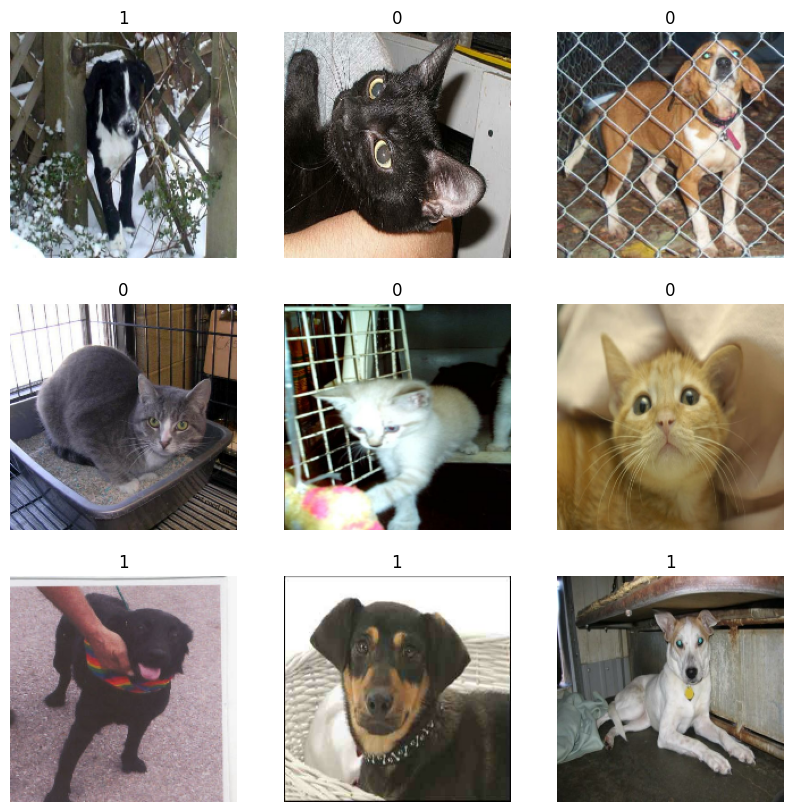

In [82]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [83]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

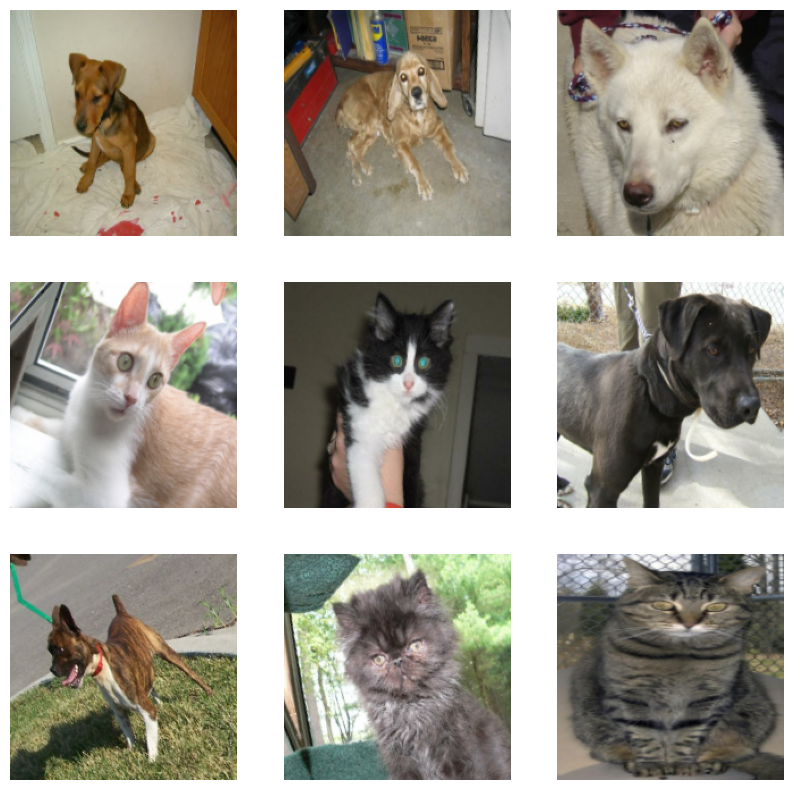

In [84]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [85]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

In [86]:
inputs = tf.keras.Input(shape=(200, 200, 3))
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same")(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [93]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
50/50 [==============================] - 6s 123ms/step - loss: 0.5621 - accuracy: 0.7181 - val_loss: 0.5996 - val_accuracy: 0.6925
Epoch 2/10
50/50 [==============================] - 6s 123ms/step - loss: 0.5727 - accuracy: 0.7006 - val_loss: 0.5622 - val_accuracy: 0.7075
Epoch 3/10
50/50 [==============================] - 6s 121ms/step - loss: 0.5187 - accuracy: 0.7350 - val_loss: 0.4903 - val_accuracy: 0.7600
Epoch 4/10
50/50 [==============================] - 6s 126ms/step - loss: 0.4908 - accuracy: 0.7656 - val_loss: 0.5058 - val_accuracy: 0.7450
Epoch 5/10
50/50 [==============================] - 6s 124ms/step - loss: 0.4855 - accuracy: 0.7725 - val_loss: 0.5174 - val_accuracy: 0.7475
Epoch 6/10
50/50 [==============================] - 6s 123ms/step - loss: 0.4782 - accuracy: 0.7738 - val_loss: 0.5199 - val_accuracy: 0.7350
Epoch 7/10
50/50 [==============================] - 6s 117ms/step - loss: 0.4524 - accuracy: 0.7756 - val_loss: 0.5182 - val_accuracy: 0.7600
Epoch 

In [104]:
img = tf.keras.preprocessing.image.load_img(
    "../data/catsdogs/dogs/1.jpg", target_size=(200, 200),
    
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 18ms/step


array([[0.17026892, 0.8297311 ]], dtype=float32)

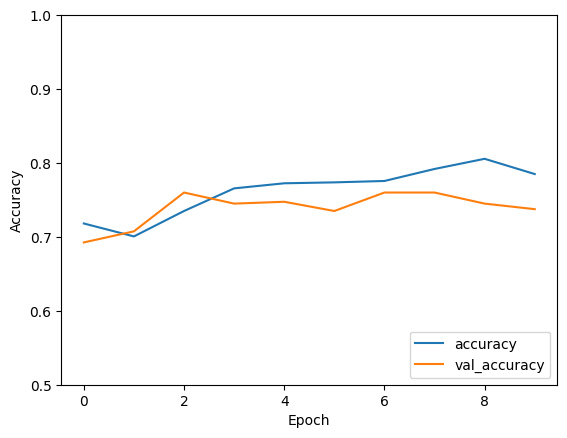

In [97]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [105]:
model.save('../models/CatsDogsModel')


INFO:tensorflow:Assets written to: ../models/CatsDogsModel/assets


INFO:tensorflow:Assets written to: ../models/CatsDogsModel/assets


In [149]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/data101",
    validation_split=0.2, 
    subset="both", 
    seed=42,
    image_size=(224,224), 
    batch_size=32, 
)

Found 154 files belonging to 3 classes.
Using 124 files for training.
Using 30 files for validation.


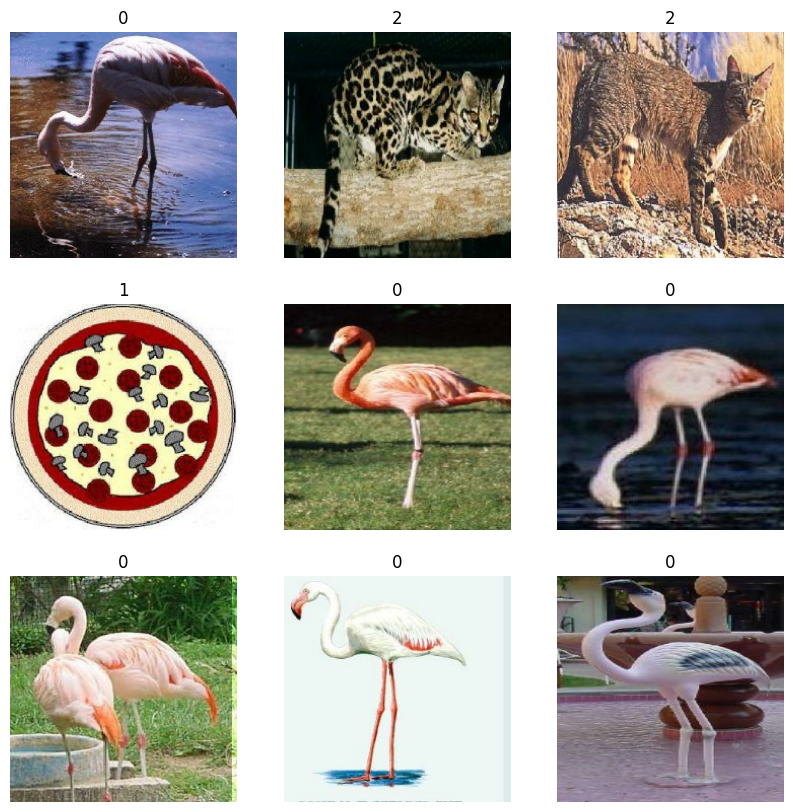

In [150]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [151]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [152]:
inp = vgg.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(vgg.layers[-2].output)
model_new = tf.keras.Model(inp, out)

In [153]:
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True
model_new.layers[-2].trainable = True

In [154]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [155]:
history_1 = model_new.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
4/4 [==============================] - 16s 4s/step - loss: 0.7592 - accuracy: 0.7823 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
4/4 [==============================] - 15s 4s/step - loss: 0.0744 - accuracy: 0.9919 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
4/4 [==============================] - 15s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 15s 4s/step - loss: 0.2123 - accuracy: 0.9839 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 15s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [113]:
img = tf.keras.preprocessing.image.load_img(
    "../data/data101/pizza/image_0007.jpg", target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)
predictions

1/1 [==============================] - 0s 231ms/step


array([[1.3788969e-05, 9.9341017e-01, 6.5760165e-03]], dtype=float32)

In [124]:
inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True)

In [139]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/data101",
    validation_split=0.2, 
    subset="both", 
    seed=42,
    image_size=(299,299), 
    batch_size=32, 
)

Found 154 files belonging to 3 classes.
Using 124 files for training.
Using 30 files for validation.


In [140]:
inp = inception.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(inception.layers[-2].output)
model_new2 = tf.keras.Model(inp, out)

In [141]:
for layer in model_new2.layers:
    layer.trainable = False
model_new2.layers[-1].trainable = True
model_new2.layers[-2].trainable = True

In [142]:
model_new2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new2.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_114 (Conv2D)            (None, 149, 149, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_114[0][0]']             
 ormalization)                  )                                                          

In [143]:
history_2 = model_new2.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
4/4 [==============================] - 8s 2s/step - loss: 9.2591 - accuracy: 0.4274 - val_loss: 4.8590 - val_accuracy: 0.3667
Epoch 2/5
4/4 [==============================] - 5s 1s/step - loss: 5.8553 - accuracy: 0.4435 - val_loss: 7.3334 - val_accuracy: 0.4333
Epoch 3/5
4/4 [==============================] - 5s 1s/step - loss: 3.9421 - accuracy: 0.5887 - val_loss: 4.0000 - val_accuracy: 0.5000
Epoch 4/5
4/4 [==============================] - 5s 1s/step - loss: 3.7214 - accuracy: 0.5403 - val_loss: 5.4654 - val_accuracy: 0.4667
Epoch 5/5
4/4 [==============================] - 5s 1s/step - loss: 2.7229 - accuracy: 0.7016 - val_loss: 3.7479 - val_accuracy: 0.5667


In [144]:
img = tf.keras.preprocessing.image.load_img(
    "../data/data101/pizza/image_0007.jpg", target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new2.predict(img_array)
predictions

1/1 [==============================] - 1s 885ms/step


array([[9.3466008e-01, 6.5114088e-02, 2.2587915e-04]], dtype=float32)

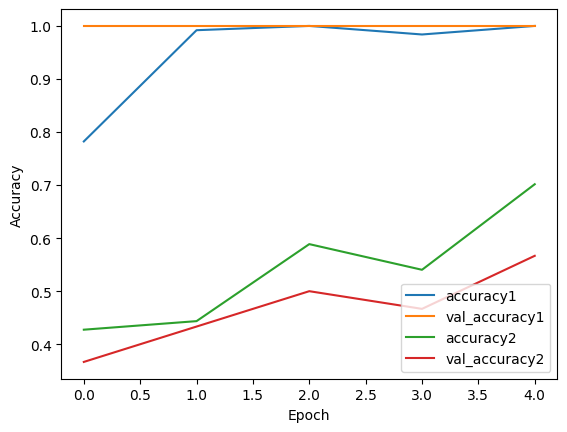

In [157]:
plt.plot(history_1.history['accuracy'], label='accuracy1')
plt.plot(history_1.history['val_accuracy'], label = 'val_accuracy1')
plt.plot(history_2.history['accuracy'], label='accuracy2')
plt.plot(history_2.history['val_accuracy'], label = 'val_accuracy2')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')